In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 
#import seaborn as sns

In [4]:
#데이터 불러오기
scored_data = pd.read_csv("~/capstone-project/data/train_targets_scored.csv")

#해당 데이터는 각각의 sig_id가 어느 MoA에 속해있는지 알려주는 labels 데이터.
#하나의 sig_id가 여러개의 class에 속할 수 있으므로 multi-label-classification.

In [5]:
#데이터 살펴보기 
scored_data.shape #데이터의 개수는 23814개. label의 개수가 207개.

(23814, 207)

In [6]:
type(scored_data) #데이터 자료형 확인

pandas.core.frame.DataFrame

In [7]:
scored_data.info() #sig_id: object, 나머지: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [8]:
scored_data.head(5)

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  tropomyosin_receptor_kinase_inhibitor  \
0                           0  ...                                      0   
1                           0  ...                                      0   
2                           0  ...                                      0   
3                           0  ...                                      0   
4                           0  ...                                      0   

   trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
0             0                0                  0   
1             0                0                  0   
2             0                0                  0   
3             0                0                  0   
4             0                0                  0   

   tyrosine_kinase_inhibitor  ubiquitin_specific_protease_inhibitor  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4                          0                                      0   

   vegfr_inhibitor  vitamin_b  vitamin_d_receptor_agonist  wnt_inhibitor  
0                0          0                           0              0  
1                0          0                           0              0  
2                0          0                           0              0  
3                0          0                           0              0  
4                0          0                           0              0  

[5 rows x 207 columns]

In [9]:
#feature visualisations
#모든 targets들은 특정 세포 타입이 약물에 반응하는지 그렇지 않은지 가리키는 binary columns. 

#몇몇의 target class들은 반응의 종류를 측정한다.(예: adrenergic_receptor_agonist/ adrenergic_receptor_antagonist)
#동일한 샘플 행에 대해서는 활동하지 않을 수 있다. 

#우리는 multi-label classification을 목표로 해 데이터들이 여러개의 class를 가질 수 있다.
#얼마나 많은 데이터들이 하나 이상의 MoA를 가지고 있는지 확인해보자

In [10]:
rowstats = scored_data.iloc[:,1:207] #데이터 객체를 알려주는 열 제거 

In [11]:
rowstats.shape 

(23814, 206)

In [12]:
#데이터별로 컬럼값들을 합한 값을 구해야 함
rowstats['row_sum'] = rowstats.sum(axis = 1) #row별로 데이터 합치기.

In [13]:
rowstats['row_sum'].value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
Name: row_sum, dtype: int64

In [14]:
#그래프를 그려보자
#rowstats별로 데이터를 분류해서 개수를 세고 막대 그래프를 그려야한다.
#label = rowstats.groupby('row_sum').row_sum.sum()
label = rowstats['row_sum'].value_counts(sort=False)
label

0     9367
1    12532
2     1538
3      303
4       55
5       13
7        6
Name: row_sum, dtype: int64

In [15]:
index = np.arange(len(label))
index

array([0, 1, 2, 3, 4, 5, 6])

Text(0.5, 1.0, 'Number of Activations per Sample')

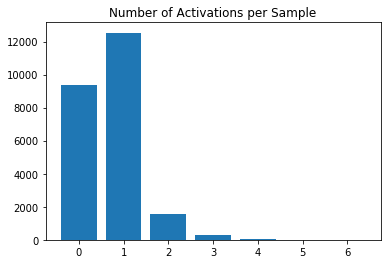

In [16]:
plt.bar(index, label )
plt.title('Number of Activations per Sample')

In [17]:
index_p = rowstats['row_sum'].value_counts(normalize = True, sort = False)
index_p

0    0.393340
1    0.526245
2    0.064584
3    0.012724
4    0.002310
5    0.000546
7    0.000252
Name: row_sum, dtype: float64

In [18]:
#class별로 얼마나 많은 데이터가 해당 class에 분류되었는지 알아보자.
a = rowstats.sum() #class(열)별로 합을 구함.
a

5-alpha_reductase_inhibitor             17
11-beta-hsd1_inhibitor                  18
acat_inhibitor                          24
acetylcholine_receptor_agonist         190
acetylcholine_receptor_antagonist      301
                                     ...  
vegfr_inhibitor                        170
vitamin_b                               26
vitamin_d_receptor_agonist              39
wnt_inhibitor                           30
row_sum                              16844
Length: 207, dtype: int64

In [19]:
rowstats.sum().max() #가장 많은 데이터가 포함된 class의 값

16844

In [20]:
rowstats.sum().min() #가장 적은 데이터가 포함된 class의 값(0 제외)

1

In [21]:
#정규분포로 class별 데이터의 분포 확인

In [22]:
#sns.distplot(a)

#대부분의 class는 2만여개의 데이터에서 10개~100개의 데이터를 가진다. 
#40개를 가지는 class가 가장 많다. 
#가장 많이 데이터가 속해있는 클래스는 832개, 가장 적은 데이터가 속해있는 클래스는 1개를 가지고 있다.

In [23]:
#MoAs가 가장 많은 class
a_df = pd.DataFrame(a)
a_df

0
5-alpha_reductase_inhibitor           17
11-beta-hsd1_inhibitor                18
acat_inhibitor                        24
acetylcholine_receptor_agonist       190
acetylcholine_receptor_antagonist    301
...                                  ...
vegfr_inhibitor                      170
vitamin_b                             26
vitamin_d_receptor_agonist            39
wnt_inhibitor                         30
row_sum                            16844

[207 rows x 1 columns]

In [24]:
a_df.columns = ['sum']
a_df

sum
5-alpha_reductase_inhibitor           17
11-beta-hsd1_inhibitor                18
acat_inhibitor                        24
acetylcholine_receptor_agonist       190
acetylcholine_receptor_antagonist    301
...                                  ...
vegfr_inhibitor                      170
vitamin_b                             26
vitamin_d_receptor_agonist            39
wnt_inhibitor                         30
row_sum                            16844

[207 rows x 1 columns]

In [25]:
a_df_max = a_df.sort_values(by='sum',ascending=False,axis = 0)
a_df_max

sum
row_sum                                     16844
nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
...                                           ...
nicotinic_receptor_agonist                      6
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1

[207 rows x 1 columns]

In [26]:
a_df_max = a_df_max[1:207]
a_df_max.shape

(206, 1)

In [27]:
type(a_df_max)

pandas.core.frame.DataFrame

In [28]:
 a_df_max[0:5] #MoA로 가장 많이 분류된 class들

sum
nfkb_inhibitor                 832
proteasome_inhibitor           726
cyclooxygenase_inhibitor       435
dopamine_receptor_antagonist   424
serotonin_receptor_antagonist  404

In [29]:
a_df_max.columns

Index(['sum'], dtype='object')

In [30]:
#Classes with fewest MoAs(가장 적은 클래스 5개)
a_df_min = a_df.sort_values(by = 'sum', axis = 0)
a_df_min[0:5]

#매우 드물게 오직 하나의 데이터만 분류된 class는 24ㅐ

sum
erbb2_inhibitor                               1
atp-sensitive_potassium_channel_antagonist    1
calcineurin_inhibitor                         6
steroid                                       6
elastase_inhibitor                            6

In [31]:
#대부분 양극단의 features는 억제제와 적대자를 특징으로 한다.

In [79]:
#class 이름의 마지막 단어는 해당 클래스가 어느부분에 속해 있는지를 알려줌.
#부분에 따른 class의 개수를 비교해보자.
rowstats_n = rowstats
column_count = []
for i in range(len(rowstats_n.columns)):
    k = rowstats_n.columns[i].count('_')
    #rowstats_n.columns[i]=
    #print(rowstats_n.columns[i].split('_')[k])
    column_count.append(rowstats_n.columns[i].split('_')[k])

In [81]:
column_count

['inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'antagonist',
 'inhibitor',
 'agonist',
 'antagonist',
 'activator',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'activator',
 'analgesic',
 'agonist',
 'antagonist',
 'local',
 'inhibitor',
 'antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'stimulant',
 'inhibitor',
 'inhibitor',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'antifolate',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'agonist',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'inhibitor',
 'blocker',
 'agonist',
 'antagonist',
 'inhibitor',
 'inhibitor',
 'activator',
 'inhibitor',
 'antagonist',
 'antagonist',
 'inhibitor',
 'agent',
 'inhibitor',
 'blocker',
 'inhibitor',
 'antagonist',
 'inhibitor',


In [78]:
w_count= {}
for lst in column_count:
    try: w_count[lst]+= 1
    except: w_count[lst]=1
print(w_count)
#유의미한 class 분류로 보이는 것은 "inhibitor","agonist","antagonist","activator","blocker정도이다.


{'inhibitor': 112, 'agonist': 28, 'antagonist': 32, 'activator': 5, 'analgesic': 1, 'local': 1, 'anti-inflammatory': 1, 'antiarrhythmic': 1, 'antibiotic': 1, 'anticonvulsant': 1, 'antifungal': 1, 'antihistamine': 1, 'antimalarial': 1, 'antioxidant': 1, 'antiprotozoal': 1, 'antiviral': 1, 'stimulant': 1, 'antifolate': 1, 'blocker': 2, 'agent': 3, 'diuretic': 1, 'scavenger': 1, 'immunosuppressant': 1, 'secretagogue': 1, 'sensitizer': 1, 'laxative': 1, 'donor': 1, 'medium': 1, 'steroid': 1, 'b': 1, 'sum': 1}


NameError: name 'ᄋᄋ' is not defined